In [3]:
import pytest
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from learnlet_model import Learnlet
from keras_utils.normalisation import NormalisationAdjustment
from learned_wavelet import learnlet



In [4]:
dataset = np.load('datasets/dataset_25_64.npy',allow_pickle='TRUE').item()

im_train, im_val, target_train, target_val = train_test_split(dataset['VIGNETS_WITH_NOISE'], dataset['VIGNET_NOISELESS'],
                                                              test_size=0.2, random_state=10)

im_train, target_train = shuffle(im_train, target_train)
im_val, target_val = shuffle(im_val, target_val)

im_train = (tf.reshape(tf.convert_to_tensor(im_train), [20000, 64, 64, 1])-np.mean(im_train))/255
target_train = tf.reshape(tf.convert_to_tensor(target_train), [20000, 64, 64, 1])
im_val = (tf.reshape(tf.convert_to_tensor(im_val), [5000, 64, 64, 1])-np.mean(im_val))/255
target_val = tf.reshape(tf.convert_to_tensor(target_val), [5000, 64, 64, 1])

In [5]:
n_channels = 1
model=learnlet(input_size=(64,64,n_channels), lr=1e-3)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
learnlet_analysis (LearnletAnal [(None, 64, 64, 3),  325         input_1[0][0]                    
__________________________________________________________________________________________________
normalisation (Normalisation)   (None, 64, 64, 3)    3           learnlet_analysis[0][0]          
                                                                 thresholding[0][0]               
__________________________________________________________________________________________________
normalisation_1 (Normalisation) (None, 32, 32, 3)    3           learnlet_analysis[0][1]      

In [ ]:
history = model.fit(im_train, target_train, validation_data=(im_val, target_val), batch_size=4, 
           epochs=400, steps_per_epoch=100)

plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss of the Learnlets on the PSF Dataset')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Epoch 1/400
100/100 [==============================] - 35s 343ms/step - loss: 6.6061e-06 - keras_psnr: 52.0282 - keras_ssim: 0.9855 - center_keras_psnr: 52.3133 - val_loss: 6.6927e-06 - val_keras_psnr: 51.9824 - val_keras_ssim: 0.9855 - val_center_keras_psnr: 52.2233
Epoch 2/400
100/100 [==============================] - 35s 354ms/step - loss: 6.6294e-06 - keras_psnr: 52.0257 - keras_ssim: 0.9855 - center_keras_psnr: 52.1444 - val_loss: 6.6917e-06 - val_keras_psnr: 51.9831 - val_keras_ssim: 0.9855 - val_center_keras_psnr: 52.2239
Epoch 3/400
100/100 [==============================] - 35s 353ms/step - loss: 6.5536e-06 - keras_psnr: 52.0969 - keras_ssim: 0.9855 - center_keras_psnr: 52.4057 - val_loss: 6.6904e-06 - val_keras_psnr: 51.9839 - val_keras_ssim: 0.9855 - val_center_keras_psnr: 52.2248
Epoch 4/400
100/100 [==============================] - 34s 343ms/step - loss: 6.7528e-06 - keras_psnr: 51.9389 - keras_ssim: 0.9855 - center_keras_psnr: 52.4125 - val_loss: 6.6887e-06 - val_keras_

100/100 [==============================] - 35s 350ms/step - loss: 2.0748e-06 - keras_psnr: 57.8140 - keras_ssim: 0.9957 - center_keras_psnr: 57.8284 - val_loss: 1.8990e-06 - val_keras_psnr: 58.2469 - val_keras_ssim: 0.9960 - val_center_keras_psnr: 58.1992
Epoch 32/400
100/100 [==============================] - 35s 353ms/step - loss: 1.8174e-06 - keras_psnr: 58.4429 - keras_ssim: 0.9962 - center_keras_psnr: 58.5608 - val_loss: 1.8054e-06 - val_keras_psnr: 58.5016 - val_keras_ssim: 0.9963 - val_center_keras_psnr: 58.4103
Epoch 33/400
100/100 [==============================] - 35s 352ms/step - loss: 1.8293e-06 - keras_psnr: 58.3928 - keras_ssim: 0.9963 - center_keras_psnr: 58.1900 - val_loss: 1.7219e-06 - val_keras_psnr: 58.7534 - val_keras_ssim: 0.9965 - val_center_keras_psnr: 58.6189
Epoch 34/400
100/100 [==============================] - 34s 344ms/step - loss: 1.6740e-06 - keras_psnr: 58.8916 - keras_ssim: 0.9966 - center_keras_psnr: 58.7141 - val_loss: 1.6487e-06 - val_keras_psnr: 58.

100/100 [==============================] - 44s 439ms/step - loss: 6.9729e-07 - keras_psnr: 63.5531 - keras_ssim: 0.9988 - center_keras_psnr: 63.5237 - val_loss: 7.8127e-07 - val_keras_psnr: 62.9875 - val_keras_ssim: 0.9987 - val_center_keras_psnr: 62.8916
Epoch 62/400
100/100 [==============================] - 43s 436ms/step - loss: 7.3681e-07 - keras_psnr: 63.2040 - keras_ssim: 0.9988 - center_keras_psnr: 63.0568 - val_loss: 7.6928e-07 - val_keras_psnr: 63.0504 - val_keras_ssim: 0.9988 - val_center_keras_psnr: 62.9603
Epoch 63/400
100/100 [==============================] - 43s 437ms/step - loss: 7.7125e-07 - keras_psnr: 63.0106 - keras_ssim: 0.9988 - center_keras_psnr: 62.9138 - val_loss: 7.5880e-07 - val_keras_psnr: 63.1554 - val_keras_ssim: 0.9988 - val_center_keras_psnr: 63.0779
Epoch 64/400
100/100 [==============================] - 43s 437ms/step - loss: 7.1477e-07 - keras_psnr: 63.4627 - keras_ssim: 0.9988 - center_keras_psnr: 63.4482 - val_loss: 7.4804e-07 - val_keras_psnr: 63.

100/100 [==============================] - 44s 440ms/step - loss: 5.7509e-07 - keras_psnr: 64.8717 - keras_ssim: 0.9991 - center_keras_psnr: 64.7879 - val_loss: 5.5766e-07 - val_keras_psnr: 64.7742 - val_keras_ssim: 0.9992 - val_center_keras_psnr: 64.7793
Epoch 92/400
100/100 [==============================] - 44s 443ms/step - loss: 5.6684e-07 - keras_psnr: 64.7633 - keras_ssim: 0.9992 - center_keras_psnr: 64.6096 - val_loss: 5.5271e-07 - val_keras_psnr: 64.8233 - val_keras_ssim: 0.9992 - val_center_keras_psnr: 64.8331
Epoch 93/400
100/100 [==============================] - 43s 438ms/step - loss: 5.6734e-07 - keras_psnr: 64.9423 - keras_ssim: 0.9992 - center_keras_psnr: 65.0127 - val_loss: 5.4785e-07 - val_keras_psnr: 64.8719 - val_keras_ssim: 0.9992 - val_center_keras_psnr: 64.8873
Epoch 94/400
100/100 [==============================] - 44s 445ms/step - loss: 4.8556e-07 - keras_psnr: 65.4403 - keras_ssim: 0.9993 - center_keras_psnr: 65.4413 - val_loss: 5.4300e-07 - val_keras_psnr: 64.

100/100 [==============================] - 46s 464ms/step - loss: 4.0975e-07 - keras_psnr: 66.2960 - keras_ssim: 0.9994 - center_keras_psnr: 66.3323 - val_loss: 4.3388e-07 - val_keras_psnr: 66.0581 - val_keras_ssim: 0.9994 - val_center_keras_psnr: 66.1830
Epoch 122/400
100/100 [==============================] - 46s 466ms/step - loss: 4.1335e-07 - keras_psnr: 66.2533 - keras_ssim: 0.9994 - center_keras_psnr: 66.3363 - val_loss: 4.3061e-07 - val_keras_psnr: 66.1246 - val_keras_ssim: 0.9994 - val_center_keras_psnr: 66.2670
Epoch 123/400
100/100 [==============================] - 46s 467ms/step - loss: 4.2340e-07 - keras_psnr: 66.1450 - keras_ssim: 0.9994 - center_keras_psnr: 66.4370 - val_loss: 4.2733e-07 - val_keras_psnr: 66.1660 - val_keras_ssim: 0.9994 - val_center_keras_psnr: 66.2988
Epoch 124/400
100/100 [==============================] - 43s 439ms/step - loss: 4.0603e-07 - keras_psnr: 66.3901 - keras_ssim: 0.9994 - center_keras_psnr: 66.6237 - val_loss: 4.2421e-07 - val_keras_psnr: 

100/100 [==============================] - 43s 436ms/step - loss: 3.1520e-07 - keras_psnr: 67.5325 - keras_ssim: 0.9995 - center_keras_psnr: 67.9690 - val_loss: 3.5396e-07 - val_keras_psnr: 67.0703 - val_keras_ssim: 0.9995 - val_center_keras_psnr: 67.4809
Epoch 152/400
100/100 [==============================] - 44s 442ms/step - loss: 3.2615e-07 - keras_psnr: 67.5522 - keras_ssim: 0.9995 - center_keras_psnr: 68.0060 - val_loss: 3.5209e-07 - val_keras_psnr: 67.1192 - val_keras_ssim: 0.9995 - val_center_keras_psnr: 67.5568
Epoch 153/400
100/100 [==============================] - 44s 444ms/step - loss: 3.4682e-07 - keras_psnr: 67.2125 - keras_ssim: 0.9995 - center_keras_psnr: 67.6855 - val_loss: 3.4990e-07 - val_keras_psnr: 67.1259 - val_keras_ssim: 0.9995 - val_center_keras_psnr: 67.5590
Epoch 154/400
100/100 [==============================] - 44s 446ms/step - loss: 3.5348e-07 - keras_psnr: 66.9794 - keras_ssim: 0.9995 - center_keras_psnr: 67.4878 - val_loss: 3.4776e-07 - val_keras_psnr: 

100/100 [==============================] - 44s 447ms/step - loss: 3.0215e-07 - keras_psnr: 67.8032 - keras_ssim: 0.9996 - center_keras_psnr: 68.5602 - val_loss: 3.0293e-07 - val_keras_psnr: 67.7283 - val_keras_ssim: 0.9996 - val_center_keras_psnr: 68.4743
Epoch 182/400
100/100 [==============================] - 43s 436ms/step - loss: 2.9332e-07 - keras_psnr: 67.9835 - keras_ssim: 0.9996 - center_keras_psnr: 68.7969 - val_loss: 3.0150e-07 - val_keras_psnr: 67.7645 - val_keras_ssim: 0.9996 - val_center_keras_psnr: 68.5061
Epoch 183/400
100/100 [==============================] - 43s 438ms/step - loss: 3.2372e-07 - keras_psnr: 67.5017 - keras_ssim: 0.9996 - center_keras_psnr: 68.3361 - val_loss: 3.0016e-07 - val_keras_psnr: 67.7688 - val_keras_ssim: 0.9996 - val_center_keras_psnr: 68.5076
Epoch 184/400
100/100 [==============================] - 43s 432ms/step - loss: 2.7106e-07 - keras_psnr: 68.3164 - keras_ssim: 0.9996 - center_keras_psnr: 69.0458 - val_loss: 2.9894e-07 - val_keras_psnr: 

100/100 [==============================] - 43s 433ms/step - loss: 2.6232e-07 - keras_psnr: 68.5677 - keras_ssim: 0.9996 - center_keras_psnr: 69.5309 - val_loss: 2.6886e-07 - val_keras_psnr: 68.2389 - val_keras_ssim: 0.9996 - val_center_keras_psnr: 69.1017
Epoch 212/400
100/100 [==============================] - 43s 436ms/step - loss: 2.8881e-07 - keras_psnr: 68.0929 - keras_ssim: 0.9996 - center_keras_psnr: 68.9577 - val_loss: 2.6785e-07 - val_keras_psnr: 68.2653 - val_keras_ssim: 0.9996 - val_center_keras_psnr: 69.1047
Epoch 213/400
100/100 [==============================] - 43s 436ms/step - loss: 2.7380e-07 - keras_psnr: 68.1838 - keras_ssim: 0.9996 - center_keras_psnr: 69.0918 - val_loss: 2.6690e-07 - val_keras_psnr: 68.2642 - val_keras_ssim: 0.9996 - val_center_keras_psnr: 69.1038
Epoch 214/400
100/100 [==============================] - 43s 433ms/step - loss: 2.8748e-07 - keras_psnr: 68.0888 - keras_ssim: 0.9996 - center_keras_psnr: 69.0895 - val_loss: 2.6587e-07 - val_keras_psnr: 

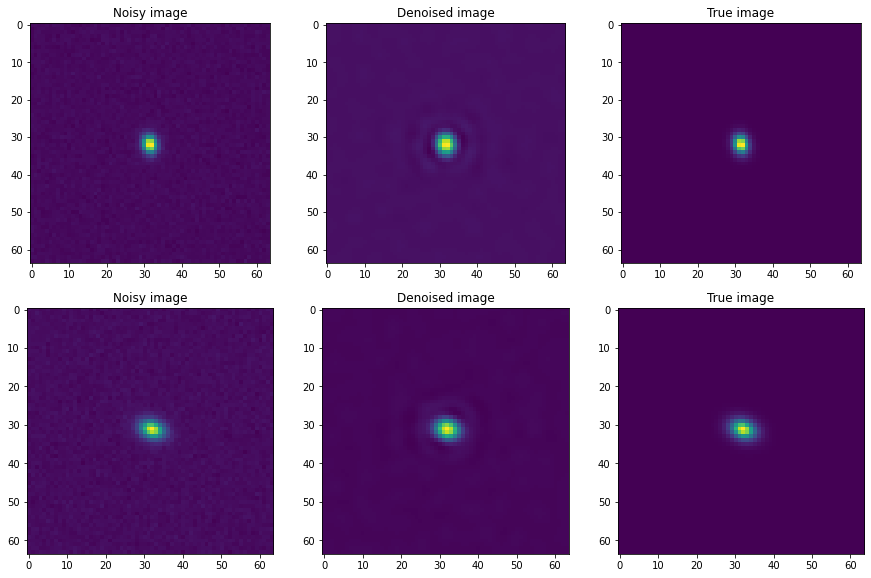

In [16]:
one_star_noiseless = model.predict(im_val)[1400,:,:]
one_star_noise = im_val[1400,:,:]
one_star_truth = target_val[1400,:,:]
second_star_noiseless = model.predict(im_val)[0,:,:]
second_star_noise = im_val[0,:,:]
second_star_truth = target_val[0,:,:]


fig = plt.figure(num=0, figsize=(15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Noisy image')
im1 = ax1.imshow(one_star_noise, interpolation='None')
ax2 = fig.add_subplot(1,3,2)
im2 = ax2.imshow(one_star_noiseless, interpolation='None')
ax2.title.set_text('Denoised image')
ax3 = fig.add_subplot(1,3,3)
im3 = ax3.imshow(one_star_truth, interpolation='None')
ax3.title.set_text('True image')
ax4 = fig.add_subplot(3,3,1)
ax4.title.set_text('Noisy image')
im4 = ax4.imshow(second_star_noise, interpolation='None')
ax5 = fig.add_subplot(3,3,2)
im5 = ax5.imshow(second_star_noiseless, interpolation='None')
ax5.title.set_text('Denoised image')
ax6 = fig.add_subplot(3,3,3)
im6 = ax6.imshow(second_star_truth, interpolation='None')
ax6.title.set_text('True image')